# Additional - Frame

![](https://raw.githubusercontent.com/ibcmrocha/public/main/framesimpler.png)

With:
- $EI = 3000$
- $q = 12$
- $EA = \infty$

Solve this problem by simplifying the stiffness matrix first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

In [2]:
L1 = 4
L2 = 2
L3 = 3
EI = 3000
q = 12

mm.Node.clear()
mm.Element.clear()

nodeA = mm.Node(0, 0)
nodeB = mm.Node(0, -L2)
nodeC = mm.Node(0, -(L2 + L3))
nodeD = mm.Node(L1, -L2)
nodeE = mm.Node(L1, 0)
nodes = [nodeA, nodeB, nodeC, nodeD, nodeE]
amount_of_nodes = len(nodes)

elemAB = mm.Element(nodeA, nodeB)
elemBC = mm.Element(nodeB, nodeC)
elemBD = mm.Element(nodeB, nodeD)
elemCD = mm.Element(nodeC, nodeD)
elemDE = mm.Element(nodeD, nodeE)
elems = [elemAB, elemBC, elemBD, elemCD, elemDE]

for elem in elems:
    elem.set_section({'EI': EI})

con = mm.Constrainer()

con.fix_dof(nodeA, 0)
con.fix_dof(nodeA, 1)
con.fix_dof(nodeB, 0)
con.fix_dof(nodeC, 0)
con.fix_dof(nodeE, 0)
con.fix_dof(nodeE, 1)

elemCD.add_distributed_load([0, q])

K_global = np.zeros((3 * amount_of_nodes, 3 * amount_of_nodes))
f_global = np.zeros(3 * amount_of_nodes)

for elem in elems:
    elmat = elem.stiffness()
    idofs = elem.global_dofs()

    K_global[np.ix_(idofs, idofs)] += elmat

for node in nodes:
    f_global[node.dofs] += node.p

Kff, Fff = con.constrain(K_global, f_global)
u_free_global = np.linalg.inv(Kff) @ Fff
print(u_free_global)

support_reactions = con.support_reactions(K_global, u_free_global, f_global)
print(support_reactions)

[-2.02922078e-04  3.83964131e-19  4.05844156e-04  8.44244743e-19
 -4.59956710e-03 -6.05949804e-19  5.76035869e-19  3.02128427e-03
 -1.51064214e-03]
[ -0.91314935 -19.19820656  24.44934034  19.26169862  -6.79788961
 -28.80179344]


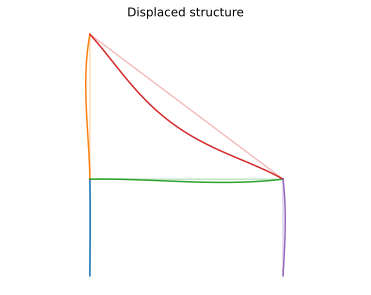

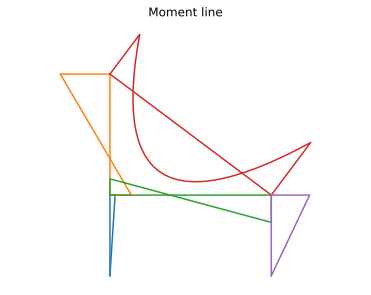

In [3]:
u_full_global = con.full_disp(u_free_global)
for elem in elems:
    elem.plot_displaced(u_full_global[elem.global_dofs()], 30, global_c=True, scale=40)

plt.figure()
for elem in elems:
    elem.plot_moment_diagram(u_full_global[elem.global_dofs()], 30, global_c=True, scale=0.07)